In [1]:
import numpy as np
import random #not good practice
import matplotlib.pyplot as plt
import math 
import statistics
from scipy import stats
import seaborn as sns

# Mixture Model Data

### sample mixture model data

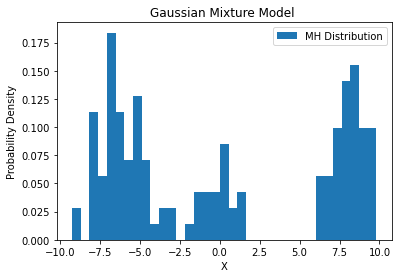

In [2]:
# define the number of points

number_of_trials=1000
mu1, sigma1, samples1 = -6, 2, 60 # mean and variance and samples
mu2, sigma2, samples2 = 8, 1, 50 # mean and variance and samples
mu3, sigma3, samples3 = 0, 1, 20 # mean and variance and samples

x1 = np.random.normal(mu1, np.sqrt(sigma1), samples1)
x2 = np.random.normal(mu2, np.sqrt(sigma2), samples2)
x3 = np.random.normal(mu3, np.sqrt(sigma3), samples3)

X = np.array(list(x1) + list(x2) + list(x3))
np.random.shuffle(X)

histogram_of_MH_predictions = plt.hist(X,density=True, stacked=True,bins=35,label="MH Distribution")  # plot a histrogram of predicted values

# graph labels
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Gaussian Mixture Model ')
plt.legend()
plt.show()



### MH fitting of mixture model ... if the mu and sigmas are known

Acceptance Rate: 26.0 %


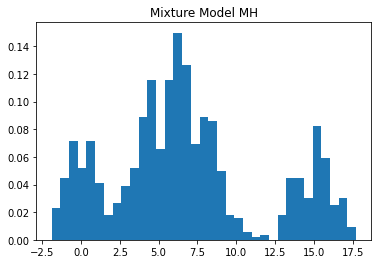

In [4]:
### libraries used ... imported at the top but for ease of compiling one section ... comment out 
import numpy as np 
import random #not good practice
import matplotlib.pyplot as plt

    
def Gaussian_Metropolis_Hasting(number_of_trials,sigma,mu,proportion):
    accepted=0 #counter for acceptance rate
    states = [] # the states of the MH
    current = random.uniform(-sigma[0]+mu[0],sigma[0]+mu[0])#choose a random number (central) to begin
    kernel_width=sigma[0] #chosen sigma as random value, but kept it relative to volume of data
    keep_up_to_date_kernel_counter = 0   
    
    
    for i in range(1,number_of_trials+1):#repeat per number of trials
        states.append(current) # add the current value to list of MH values
        predicted = random.uniform(current-kernel_width,current+kernel_width) # predict a value, based off how close the running acceptance rate is to ideal 25-27%
        
        probability_of_current0 = (np.exp((-(current-mu[0])**2)/(2*sigma[0]**2)))*proportion[0] #probability of current value given known distributuin
        probability_of_current1 = (np.exp((-(current-mu[1])**2)/(2*sigma[1]**2)))*proportion[1] #probability of current value given known distributuin
        probability_of_current2 = (np.exp((-(current-mu[2])**2)/(2*sigma[2]**2)))*proportion[2] #probability of current value given known distributuin
        
        total_probability_of_current = probability_of_current0+probability_of_current1+probability_of_current2
         
        probability_of_predicted0 = (np.exp((-(predicted-mu[0])**2)/(2*sigma[0]**2)))*proportion[0] #probability of predicted value given known distributuin
        probability_of_predicted1 = (np.exp((-(predicted-mu[1])**2)/(2*sigma[1]**2)))*proportion[1] #probability of predicted value given known distributuin
        probability_of_predicted2 = (np.exp((-(predicted-mu[2])**2)/(2*sigma[2]**2)))*proportion[2] #probability of predicted value given known distributuin
        
        total_probability_of_predicted = probability_of_predicted0+probability_of_predicted1+probability_of_predicted2
        
        acceptance = min(total_probability_of_predicted/total_probability_of_current,1) # if the proability of predicted is grater than current given the known distribution
        
        if random.uniform(0,1)<acceptance: #if the probability of the predicted value is greater than a random float accept it. if not... do nothing
            accepted=accepted+1 #increse the acceptance count
            current = predicted #set the current value to the predicted one
        if accepted/i > 0.27: #if the acceptance rate is too high > 27% 
            kernel_width = kernel_width - ((accepted/i)-0.25)# make sure it requires a closer number to current next iteration
        if accepted/i < 0.25: #if the acceptance rate is too high > 27% make sure its decreased next iteration
            kernel_width = kernel_width + (0.27-(accepted/(i))) # make sure it requires a further number to current next iteration
        
               
        keep_up_to_date_kernel_counter= keep_up_to_date_kernel_counter+1
        if keep_up_to_date_kernel_counter==15: # we want to restart counting the accepted rate after the warm up period
            accepted=int(0.26*i) #remove any inconsitency from the warm up period
            keep_up_to_date_kernel_counter=0
             
                
    return states ,accepted;# [burn_in:] # uncomment if having a warm up 20%



### Setting Parameters ###
mu=[15,6,0]
proportion=[0.2,0.5,0.3]
number_of_trials=1000
sigma=[1,2,1] #larger sigmas can have a impact on the acceptance rate. 
number_of_stacks=20 # number of recatngles on graph



MH_predictions,accepted =  Gaussian_Metropolis_Hasting(number_of_trials,sigma=sigma,mu=mu,proportion=proportion) # run the MH prediction: number of iterations, mean and variation. 

plt.title ('Mixture Model MH')

histogram_of_MH_predictions = plt.hist(MH_predictions,density=True, stacked=True,bins=35,label="MH Distribution")  # plot a histrogram of predicted values

#the acceptance rate is based on the values after the warm up period
#to make the acceptance values include that of the warm up period comment out the lines as indicated above
print('Acceptance Rate:', round(accepted*100/number_of_trials,2),'%') #print the acceptance rate - for accuracry purpose only
    

